In [1]:
import pandas as pd
df=pd.read_csv("d:/data/customer/customer.csv")
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [2]:
cols=df.columns[0:-1]
X=df[cols]
y=df["Churn"]
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [3]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Churn'])
df_samp=pd.concat([X_samp, y_samp], axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [7]:
X=df_samp[cols]
y=df_samp['Churn']

<AxesSubplot:>

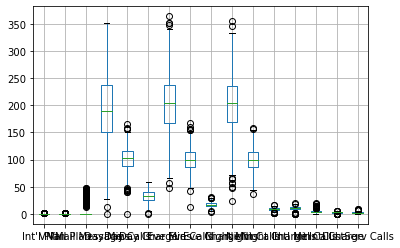

In [8]:
%matplotlib inline
X.boxplot()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X))

<AxesSubplot:>

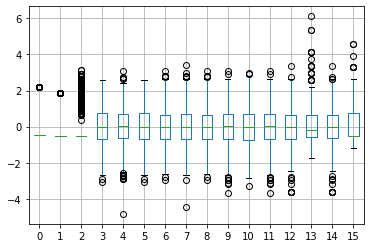

In [10]:
X_scaled.boxplot()

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm=SVC()
n_estimators=10
model=BaggingClassifier(base_estimator=svm, n_estimators=n_estimators, max_samples=1/n_estimators, n_jobs=2)

In [14]:
import numpy as np
import math
from sklearn.model_selection import cross_val_score

costs=np.logspace(-10, 3, 14) # 10^(-10) ~ 10^3 - 14개
scores=[]
for c in costs:
    model.base_estimator.C=c
    this_scores=cross_val_score(model, X_scaled, y, n_jobs=2, cv=3) # 교차검증
    m=np.mean(this_scores)
    print(c,'→',m)
    scores.append(m)

print('max :', max(scores))
print('idx :', np.argmax(scores))
print('C :', costs[np.argmax(scores)])

1e-10 → 0.5
1e-09 → 0.5
1e-08 → 0.5
1e-07 → 0.5
1e-06 → 0.5600414078674948
1e-05 → 0.5
0.0001 → 0.5507246376811594
0.001 → 0.562111801242236
0.01 → 0.5
0.1 → 0.5579710144927535
1.0 → 0.7784679089026915
10.0 → 0.8198757763975154
100.0 → 0.7898550724637681
1000.0 → 0.7888198757763975
max : 0.8198757763975154
idx : 11
C : 10.0


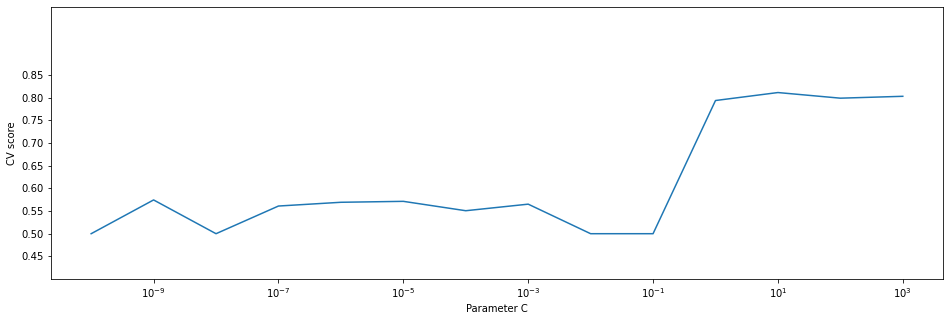

In [13]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)
locs, labels=plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()